In [44]:
from gensim.models.doc2vec import  Doc2Vec, TaggedDocument
from nltk import word_tokenize
import pandas as pd  
import string 
import numpy as np


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

In [2]:
input_data7 = pd.read_csv('input_data7.csv', header = 0,
                          usecols= ['patent_id', 'combined'],
                          dtype = {'patent_id':object},
                          encoding = 'ISO-8859-1')

In [3]:
my_columns = input_data7['patent_id'].tolist() # create patent list
corpus = input_data7['combined'].tolist()
patent_numbers = '|'.join(my_columns)

In [3]:
#preprocessing 


patent_terms = pd.read_csv('patent_terms.csv', encoding = 'ISO-8859-1')
patent_terms = patent_terms.rename(columns={0:'terms'})
patent_terms_append = ['claim','claimed','according','selected','comprising','consisting','means','le','wt','group','thereof','weight']
patent_terms = patent_terms.append(pd.DataFrame(patent_terms_append, columns=['terms']), ignore_index=True)
patent_terms = patent_terms.drop_duplicates()
patent_terms.to_csv('patent_terms.csv', index=False)

jargon = set(patent_terms.iloc[:, 0])  # build a "patent jargon" lexical
''' jargon removes word "containing", we want to weigh lignosulfonate which follows!'''

## Punctuation
# nltk.download('punkt')
punctuations = set(string.punctuation)
punctuations.remove('-') # maybe remove hyphens
#punctuations.remove('/')

from nltk.stem.wordnet import WordNetLemmatizer
lemma = WordNetLemmatizer()
word_len = 2
def clean(doc):
    number_free = ''.join([c for c in doc if c not in "1234567890"])
    words = [word.strip(string.punctuation) for word in number_free.split(" ")]
    filtered = [f for f in words if f and f.lower() not in stop_words]
    undo = "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered]).strip()
    punc_free = ''.join(ch for ch in undo if ch not in punctuations)
    smallword_free = ' '.join([w for w in punc_free.split() if len(w) > word_len])
    lemmatized = " ".join(lemma.lemmatize(word) for word in smallword_free.split())
    jargon_free = " " .join([j for j in lemmatized.lower().split() if j not in jargon])
    return jargon_free

In [6]:
corpus_clean = [clean(doc) for doc in corpus] # list of sentance strings
#corpus_tokenize = [clean(doc).split() for doc in corpus]  # list of string words

In [81]:
corpus_clean[0]

'plywood adhesive phenolic plywood adhesive containing lignosulfonates trialkyl phosphate alkyltituents carbon atom use curtain coater described process applying phenol-formaldehyde resin adhesive containing amylaceous proteinaceous material plywood veneer using curtain coater improvement comprises adding least percent based upon weight phenol-formaldehyde resin said adhesive sodium base lignosulfonate percent based upon weight phenol-formaldehyde resin trialkyl phosphate alkyltituents carbon atomsa process according claim wherein trialkyl phosphate tributyl phosphatea process according claim wherein sodium base lignosulfonate added amount weight percenta process according claim wherein trialkyl phosphate tributyl phosphate added amount percenta process according claim wherein sodium lignosulfonate added phenol formaldehyde mixture condensation phenol formaldehyde preparation phenol-formaldehyde resina process according claim wherein lignosulfonate added amount weight percent trialkyl 

In [82]:
#data = data_df['combined'].tolist()

In [83]:
tagged_data = [TaggedDocument(words= word_tokenize(_d.lower()), tags = [str(i)])
              for i, _d in enumerate(corpus_clean)]

#Need to figure out how to make the patent ID the document tag
# tagged_data = [TaggedDocument(words= word_tokenize(_d.lower()), tags = [str(i)])
#               for i, _d in enumerate(data)]








In [ ]:
len(tagged_data)

## Training the model

In [ ]:
max_epochs = 100
vec_size = 300
alpha = 0.025

model = Doc2Vec(size= vec_size,
               alpha = alpha,
                min_alpha = 0.0025,
                min_count = 1, 
                dm = 1
               )

model.build_vocab(tagged_data)

for epoch in range(max_epochs):
    print('iteration {0}'.format(epoch))
    model.train(tagged_data,
                total_examples=model.corpus_count,
                epochs=model.iter)
    # decrease the learning rate
    model.alpha -= 0.0002
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

model.save("patentd2v_model")
print("Model Saved")

## Load saved model

In [45]:
modell = Doc2Vec.load('patentd2v_model')

In [46]:
# to find most similar doc using tags
similar_doc = modell.docvecs.most_similar("1")
print(similar_doc)

[('306', 0.4959915578365326), ('123', 0.4942142367362976), ('76', 0.4361250698566437), ('41', 0.4006164073944092), ('222', 0.3942888379096985), ('4931', 0.3793490529060364), ('230', 0.3686369061470032), ('5500', 0.3670188784599304), ('5153', 0.36132562160491943), ('4270', 0.35854288935661316)]


In [6]:
input_data7['combined'].iloc[1]

'Apparatus for heating a window A grid of heating conductors for defrosting applied to the window of a vehicle is connected to a source of electrical energy through a relay-operated switch. This switch is closed either in response to a drop in the resistance between two conductors or electrodes mounted in spaced relation on an insulatingort such as the window (the drop occurring by accumulation of moisture on theort and between the conductors) or in response to a drop in temperature at or near the window. For this purpose the resistance between the two conductors over the surface of theort may be paralleled by a thermostatic switch which closes with drop in temperature, both this resistance and the thermostatic switch being in the input to a trigger circuit controlling the relay to energize it in response to a decline in resistance at that input. Alternatively the trigger circuit may include thermistors which sense the drop in temperature and set the trigger circuit to the condition wh

In [7]:
input_data7['combined'].iloc[306]

'Electrically heated vehicle window A humidity-responsive heating circuit for a window of an automotive vehicle includes a grid of heating conductors on the window and two conductors closely approaching each other on the surface of the window such that the resistance between them changes, upon the appearance of humidity bridging the space between them, sufficiently to provide a signal. All of the conductors are composed of the same paste having the same properties and are applied as a single baked, silk screen printed pattern. The circuit may further include a switch to apply a voltage between those two conductors, amplifying means responsive to change of resistance between them, and a relay controlled by the amplifying means for connection of the heating grid to a source of voltage. Apparatus for heating a glass window comprising, on the inside surface of a window, a plurality of spaced electrical resistance heating conductors connected between bus bars and at least one additional con

In [8]:
input_data7['combined'].iloc[123]

'Control system for vehicle window heater Apparatus for controllably heating a vehicle window having a heating grid is described including an oscillator and a signal detector, with a signal circuit coupling the oscillator and the signal detector having a DC voltage component at one or more points thereof. One or more humidity detectors are coupled to the signal circuit to control the amplitude of the oscillationslied from the oscillator to the signal detector, advantageously by voltage divider action, and capacitor means provides DC isolation between the humidity detector(s) and any DC voltage component in the signal circuit, and also between humidity detectors when a plurality are used. Advantageously the humidity detector(s) are directly connected to the heating grid, and varying DC voltage levels at the point(s) of connection to the grid are isolated by the capacitor means. Particular arrangements of the humidity detectors on the window and connections to the heating grid are descri

### Enter new patent here

In [33]:
# test_patent = ('''A lock for a height-adjustable crib or playpen requires two distinct manual operations in order to release 
# the lock on each crib leg. Each lock includes a rigid metal bracket which engages around the extensible part o
# f the leg and is pivotally connected to a crib corner post. The bracket has a nose which projects into one of a 
# series of openings in the extensible part of the leg then the bracket is swung against the leg part to prevent
# movement of the leg part relative to the post. The upper edge of the bracket is slotted to receive a latch pivotally 
# connected to the corner post just above the bracket. The latch drops into the slot when the nose is engaged in one of the openings 
# so that the bracket cannot be moved.''')

test_patent = ('''A scaffold structure comprising a pair of leg frames and a support frame. The support frame includes
a pair of posts vertically slidably received in the leg frames and means for locking the same thereto at selected elevations. 
The support frame includes telescopically engaged members whereby it can be 
extended or contracted and locked to provide a support of different lengths.
 A scaffold structure comprising at least two rigid
5
10
15
leg frames, each set of leg frames including a pair of 20
spaced-apart legs and a top portion, upper collar ele
ments each having an opening therethrough and being
secured to said top portion with said openings extend
ing vertically, a platform frame including a pair of par allel spaced-apart post members having cross-sections
complementary to said collar openings whereby said
posts are slidably, vertically received through said
upper collars, respectively, a platform support includ
ing a pair of telescopically engaged platform members
fixedly secured adjacent their distal ends to respective
ones of the upper ends of said post members, post locking means for locking said posts in selected verti
cally displaced positions to said collar members with
said platform members extending laterally between
said leg frames in a plane generally perpendicular to
the plane including said legs, support locking means for
locking said support members in selected telescopically extended positions, a storage collar element fixedly secured to each of said leg frames, each said storage collar element having an opening therethrough, said
openings having an axis disposed generally parallel to a
plane including said legs, said storage collar openings being dimensioned to slidably receive said posts there
through, the outer one of said platform members being
open at both ends thereof, the inner one of said plat form members being slidably receivable into either end
thereof, whereby said leg frames can be vertically stacked in interlocking relationship upon one another, said platform support can be assembled with said posts in closely spaced-apart relationship with said posts being slidably received in said storage collar elements.
2. The structure of claim 1 wherein said support locking means includes a threaded opening through the
25
30
35
40
45
50
55
60
65
6
outer one of said telescopically engaged platform mem
bers and a threaded element threadingly received
therein, said threaded element frictionally engaging the
inner one of said telescopically engaged platform mem
bers upon rotation thereof to thereby lock said mem
bers.
3. The structure of claim 1 wherein at least one of
said storage collar elements includes locking means for
locking one of said posts thereto.
4. The structure of claim 1 further including a brace
fixedly secured between said leg portions of each said
leg frame in vertically spaced-apart relationship to said
top portion, a lower collar element having an opening therethrough secured to each of said braces with the
opening thereof in axial alignment with the respective
one of said openings of said upper collar elements, said
lower collar element openings being dimensioned to
receive said posts therein.
5. The structure of claim 4 wherein said upper and
lower collar elements are tubular elements of rectangu lar cross-section, said posts having a rectangular cross
section dimension to be slidably received within said
upper and lower collar elements, relative rotational
movement therebetween being restrained thereby. 6. The structure of claim 4 wherein said post locking
means includes a pair of holes formed in axial registry through opposite sides of one of said upper and lower
collar members, a plurality of vertically spaced-apart holes through said posts in positions in registry with
said collar holes at each vertically spaced-apart posi tion of said platform frame, and a retaining pin having
a length greater than the distance between said collar
holes and a diameter dimensioned to be slidably re
ceived therein.
7. The structure of claim 6 wherein said retaining pins further include a spring clip having a U-shaped configuration and dimensioned to resiliently and lock
ingly engage said collar elements when said retaining pins are received therein.
8. The structure of claim 4 wherein said leg frames
are formed of a single elongated member formed into
an arch, said leg portions being the distal ends of said
member, said top portion being the apex portion of said
arch.
9. The structure of claim 8 wherein said posts are
received through said upper and lower collar elements
with said platform members disposed in a position above said top portions.
10. The structure of claim 8 wherein said posts are
received through said upper and lower collar elements
with said platform members disposed below said top portions. ''')

In [34]:
test_clean = word_tokenize(clean(test_patent))

In [35]:
test_clean

['scaffold',
 'structure',
 'comprising',
 'pair',
 'leg',
 'frame',
 'support',
 'frame',
 'support',
 'frame',
 'includes',
 'pair',
 'post',
 'vertically',
 'slidably',
 'received',
 'leg',
 'frame',
 'mean',
 'locking',
 'thereto',
 'selected',
 'elevation',
 'the',
 'support',
 'frame',
 'includes',
 'telescopically',
 'engaged',
 'member',
 'whereby',
 'extended',
 'contracted',
 'locked',
 'provide',
 'support',
 'different',
 'length',
 'scaffold',
 'structure',
 'comprising',
 'least',
 'two',
 'rigid',
 'leg',
 'frame',
 'set',
 'leg',
 'frame',
 'including',
 'pair',
 'spaced-apart',
 'leg',
 'top',
 'portion',
 'upper',
 'collar',
 'ele',
 'ments',
 'opening',
 'therethrough',
 'being',
 'secured',
 'said',
 'top',
 'portion',
 'said',
 'opening',
 'extend',
 'ing',
 'vertically',
 'platform',
 'frame',
 'including',
 'pair',
 'par',
 'allel',
 'spaced-apart',
 'post',
 'member',
 'cross-sections',
 'complementary',
 'said',
 'collar',
 'opening',
 'whereby',
 'said',
 'pos

#### Vectorize the new patent

In [36]:

v1 = modell.infer_vector(test_clean)
print("V1_infer", v1)


V1_infer [  1.11685939e-01  -5.47943950e-01  -4.72416282e-01   2.08398327e-01
  -1.24691451e+00   2.98042655e-01  -1.21586367e-01  -5.04402995e-01
  -2.25994382e-02  -7.04359859e-02  -1.39247760e-01  -1.05102599e-01
   4.24232006e-01  -7.68381298e-01   6.92254364e-01  -7.97585428e-01
   1.07196815e-01   1.24219252e-04  -7.47146726e-01  -1.65851370e-01
   3.50263000e-01  -2.40573868e-01  -6.64941192e-01   7.76044905e-01
   9.37049910e-02  -9.28207021e-03  -3.85854512e-01   5.38405776e-01
  -1.38598651e-01  -1.42000747e+00   7.63916612e-01  -4.26681042e-01
  -6.89471781e-01  -1.00065267e+00  -8.46102774e-01   1.44360304e-01
   2.88803816e-01  -1.15489654e-01  -7.76152611e-01   8.74718308e-01
   2.97739148e-01  -8.00522149e-01   8.19579586e-02   4.37727928e-01
   4.62005645e-01   6.12255037e-01  -3.40763330e-02   3.63751054e-01
   2.85684913e-01   3.91590416e-01  -1.73106074e-01   7.52761364e-02
   6.04505181e-01  -6.29939735e-01   2.21603021e-01  -1.18645795e-01
  -4.04369205e-01   7.018

#### Check similarity with existing patents

In [41]:
vector_1 = modell.docvecs["42"]

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

In [43]:
cosine_similarity(vector_1, v1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([[ 0.36031145]], dtype=float32)

In [37]:
similar_doc_test = modell.docvecs.most_similar([v1])
print(similar_doc_test)

[('2537', 0.39173418283462524), ('3920', 0.38003069162368774), ('3089', 0.37289172410964966), ('3109', 0.37259286642074585), ('5515', 0.3642394542694092), ('5583', 0.36417338252067566), ('42', 0.36031144857406616), ('5169', 0.3592569828033447), ('83', 0.3530380129814148), ('885', 0.3510917127132416)]


#### Manually check similar patents

In [48]:
input_data7['combined'].iloc[42]

'Door lock A lock for sliding doors for cabinets and the like. A shoulder on a catch element carried by the door extends through a lock opening in the cabinet frame and engages the edge thereof to secure the door. A key of particular length moves the shoulder from the locked position to an intermediate position at which it can pass outwardly through the back opening. If the catch element is moved too far, a second shoulder engages the edge of the lock opening and the door cannot be opened. A lock for securing a door member to a frame member, said lock comprising:means defining a lock opening having first and second edge portions on one of said members,a catch element mounted on the other of said members, said catch element having a free end portion extendable through said lock opening when said door member is closed, said free end portion having first and second locking shoulders extending outwardly in different directions, said free end portion being movable between a first position w

## Clustering 

In [21]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [22]:
mat = modell.docvecs[0]
mat = mat.reshape(1,300)

for i in range(1, 5651):
    doc_vec = modell.docvecs[i]
    doc_vec = doc_vec.reshape(1,300)
    mat = np.vstack((mat,doc_vec))

In [13]:
np.vstack(b).shape

(1, 300)

In [14]:
mat.shape
X=mat

### Scree plot to check for number of principal components to use


In [25]:
covar_matrix = PCA(n_components = 300)

covar_matrix.fit(X)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features



array([   1.6,    2.9,    4.1,    5.2,    6.2,    7.2,    8.2,    9.1,
         10. ,   10.8,   11.6,   12.4,   13.2,   14. ,   14.7,   15.4,
         16.1,   16.8,   17.5,   18.2,   18.9,   19.6,   20.2,   20.8,
         21.4,   22. ,   22.6,   23.2,   23.8,   24.4,   25. ,   25.6,
         26.2,   26.8,   27.4,   27.9,   28.4,   28.9,   29.4,   29.9,
         30.4,   30.9,   31.4,   31.9,   32.4,   32.9,   33.4,   33.9,
         34.4,   34.9,   35.4,   35.9,   36.4,   36.9,   37.4,   37.9,
         38.4,   38.9,   39.4,   39.8,   40.2,   40.6,   41. ,   41.4,
         41.8,   42.2,   42.6,   43. ,   43.4,   43.8,   44.2,   44.6,
         45. ,   45.4,   45.8,   46.2,   46.6,   47. ,   47.4,   47.8,
         48.2,   48.6,   49. ,   49.4,   49.8,   50.2,   50.6,   51. ,
         51.4,   51.8,   52.2,   52.6,   53. ,   53.4,   53.8,   54.2,
         54.6,   55. ,   55.4,   55.8,   56.2,   56.6,   56.9,   57.2,
         57.5,   57.8,   58.1,   58.4,   58.7,   59. ,   59.3,   59.6,
      

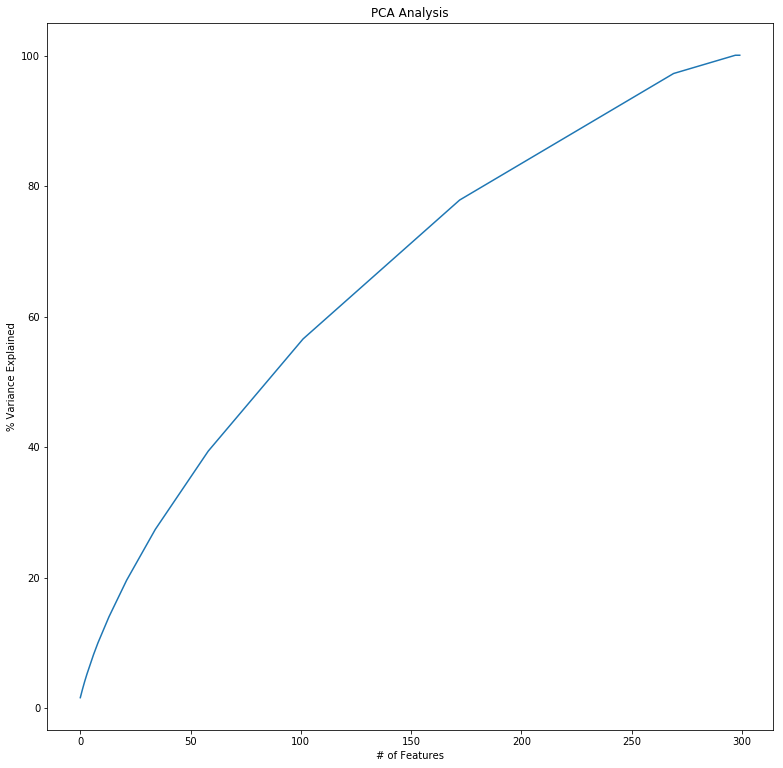

In [29]:
plt.figure(figsize=(13,13))
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
#plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

### K-Means clustering 


###### Elbow method to check for optimal number of clusters

In [85]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(reduced_data)
    Sum_of_squared_distances.append(km.inertia_)

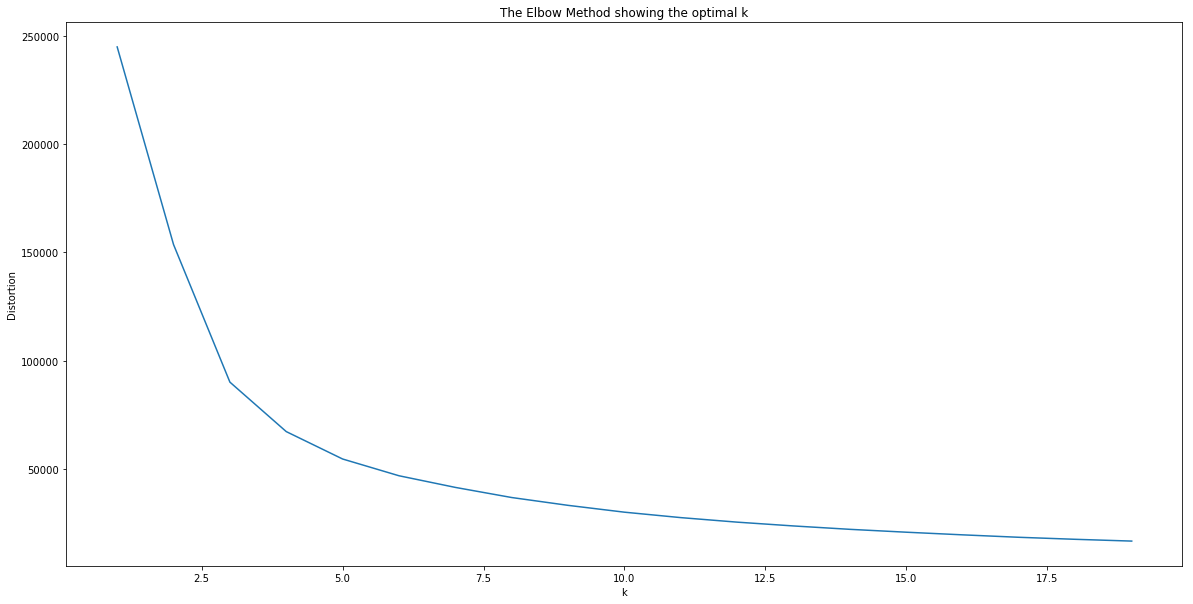

In [86]:
plt.figure(figsize=(20,10))
plt.plot(K, Sum_of_squared_distances)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [72]:
reduced_data = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(init='k-means++', n_clusters=5)
kmeans.fit(reduced_data)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [73]:
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min(), reduced_data[:, 0].max() 
y_min, y_max = reduced_data[:, 1].min(), reduced_data[:, 1].max() 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


In [74]:
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

#Z = kmeans.predict(reduced_data([:100],[:]))
Z.shape
xx.shape

(1430, 1480)

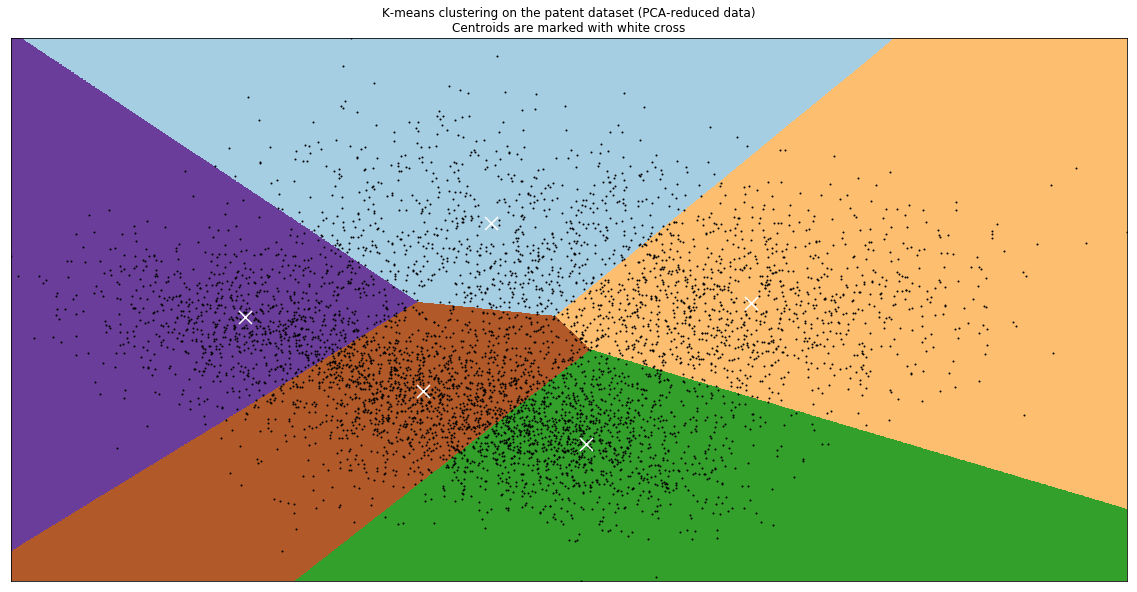

In [75]:
Z = Z.reshape(xx.shape)
plt.figure(figsize=(20,10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the patent dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()